In [13]:

# The first step is in any ml project is to analyse the data we have and prepare it
# First to import relevant libraries and modules that will be used for data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy # for skewness and kurtosis

# Importing our data 
transaction_data = pd.read_csv('data/Retail_Data_Transactions.csv')
responses_data = pd.read_csv('data/Retail_Data_Response.csv')


## Exploritory Data Analysis

In [14]:
# Initial look at the data
print(' There are',len(transaction_data), 'rows of retail data, with columns of customer id, their transaction date and transaction amount \n')
print(transaction_data)

print('\n There are',len(responses_data), 'rows of response data, with a column of if customers usually respond to a promotion or not \n')
print(' To make sure number of customers is the same as our transactional data, the unique clients in transactional data is', transaction_data['customer_id'].nunique())
print('\n Out of the 6889 customers, we can account for 6884 responses, sufficient grounds for us to make this a supervised binary classifiaction model')
print(responses_data)

 There are 125000 rows of retail data, with columns of customer id, their transaction date and transaction amount 

       customer_id trans_date  tran_amount
0           CS5295  11-Feb-13           35
1           CS4768  15-Mar-15           39
2           CS2122  26-Feb-13           52
3           CS1217  16-Nov-11           99
4           CS1850  20-Nov-13           78
...            ...        ...          ...
124995      CS8433  26-Jun-11           64
124996      CS7232  19-Aug-14           38
124997      CS8731  28-Nov-14           42
124998      CS8133  14-Dec-13           13
124999      CS7996  13-Dec-14           36

[125000 rows x 3 columns]

 There are 6884 rows of response data, with a column of if customers usually respond to a promotion or not 

 To make sure number of customers is the same as our transactional data, the unique clients in transactional data is 6889

 Out of the 6889 customers, we can account for 6884 responses, sufficient grounds for us to make this a supe

In [15]:
print( 'Checking for missing values',transaction_data.isnull().sum(),'\n')
# Checking the data types we are dealing with
print(transaction_data.info())

# Getting statistical data from the transaction amount customers spend
# Here we can see the minimum, maximum and mean amount spent by customers
print(transaction_data.describe())
print('\nThis indicates that on average,a visit to a store costs a customer about $64.99, the minimum spent on a visit was $10.00 and the maximum $105.00')

Checking for missing values customer_id    0
trans_date     0
tran_amount    0
dtype: int64 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125000 entries, 0 to 124999
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   customer_id  125000 non-null  object
 1   trans_date   125000 non-null  object
 2   tran_amount  125000 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.9+ MB
None
         tran_amount
count  125000.000000
mean       64.991912
std        22.860006
min        10.000000
25%        47.000000
50%        65.000000
75%        83.000000
max       105.000000

This indicates that on average,a visit to a store costs a customer about $64.99, the minimum spent on a visit was $10.00 and the maximum $105.00


 From the graph we can see that there are no outliers


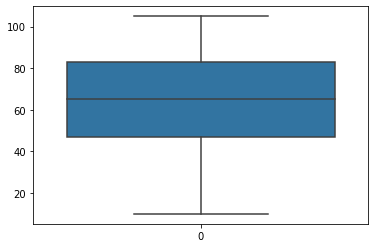

In [16]:

ax = sns.boxplot(data = transaction_data['tran_amount'])
print(' From the graph we can see that there are no outliers')


## Time Series Feature Generation

In [17]:
# Since we are analysing time series data and how it influences future trends, we have create time series features that can be used for analysis

# First changing the date column to standard time, making it easier to deal with time features
transaction_data["txn_date"] = pd.to_datetime(transaction_data["trans_date"], format = 'mixed')
transaction_data = transaction_data.drop(columns ="trans_date")

 # Min and Max of txn_date
min_date = min(transaction_data["txn_date"])
max_date = max(transaction_data["txn_date"])
print('The min of the transaction dates is:', min_date , '\n')
print('The max of the transaction dates is:', max_date)

# Column for the last day of the month 
transaction_data["month_end_date"] = transaction_data["txn_date"] + pd.offsets.MonthEnd(0)

# Column with year 
transaction_data["year"] = pd.DatetimeIndex(transaction_data["txn_date"]).year
transaction_data


The min of the transaction dates is: 2011-05-16 00:00:00 

The max of the transaction dates is: 2015-03-16 00:00:00


,customer_id,tran_amount,txn_date,month_end_date,year
0,CS5295,35,2013-02-11,2013-02-28,2013
1,CS4768,39,2015-03-15,2015-03-31,2015
2,CS2122,52,2013-02-26,2013-02-28,2013
3,CS1217,99,2011-11-16,2011-11-30,2011
4,CS1850,78,2013-11-20,2013-11-30,2013
...,...,...,...,...,...
124995,CS8433,64,2011-06-26,2011-06-30,2011
124996,CS7232,38,2014-08-19,2014-08-31,2014
124997,CS8731,42,2014-11-28,2014-11-30,2014
124998,CS8133,13,2013-12-14,2013-12-31,2013


### 1. Features that Capture Annual Spending

#### Capturing the clients annual spending by using the rationale that the clients spend is not very frequent to capture in a monthly aggregation 

In [18]:
# Creating an annual aggregrations dataframe with its information
# This will give annual statistical data for each client, for example, max/min they spent a year, sum etc
# We group the data based on the customer ID and years they made transcations. The statistics we look at are for the transaction amount
column_names = (['ann_txn_amt_sum','ann_txn_amt_ave','ann_txn_amt_std','ann_txn_amt_var','ann_txn_amt_sem','ann_txn_amt_max','ann_txn_amt_min','ann_txn_cnt'])
clnt_annual_aggregations = transaction_data.groupby(['customer_id','year'])['tran_amount'].agg(['sum','mean','std','var','sem','max','min','count'])
clnt_annual_aggregations.columns = column_names
clnt_annual_aggregations


ann_txn_amt_sum  ann_txn_amt_ave  ann_txn_amt_std  \
customer_id year                                                      
CS1112      2011              212        70.666667        22.030282   
            2012              337        67.400000        12.720063   
            2013              212        70.666667        34.501208   
            2014              212        70.666667        16.862186   
            2015               39        39.000000              NaN   
...                           ...              ...              ...   
CS9000      2011               39        19.500000         4.949747   
            2012              216        54.000000        16.772994   
            2013              147        73.500000         3.535534   
            2014               97        24.250000         8.261356   
            2015               34        34.000000              NaN   

                  ann_txn_amt_var  ann_txn_amt_sem  ann_txn_amt_max  \
customer_id year                                                      
CS1112      2011       485.333333        12.719189               96   
            2012       161.800000         5.688585               81   
            2013      1190.333333        19.919282              105   
            2014       284.333333         9.735388               90   
            2015              NaN              NaN               39   
...                           ...              ...              ...   
CS9000      2011        24.500000         3.500000               23   
            2012       281.333333         8.386497               77   
            2013        12.500000         2.500000               76   
            2014        68.250000         4.130678               35   
            2015              NaN              NaN               34   

                  ann_txn_amt_min  ann_txn_cnt  
customer_id year                                
CS1112      2011               56            3  
            2012               52            5  
            2013               36            3  
            2014               59            3  
            2015               39            1  
...                           ...          ...  
CS9000      2011               16            2  
            2012               37            4  
            2013               71            2  
            2014               16            4  
            2015               34            1  

[31140 rows x 8 columns]

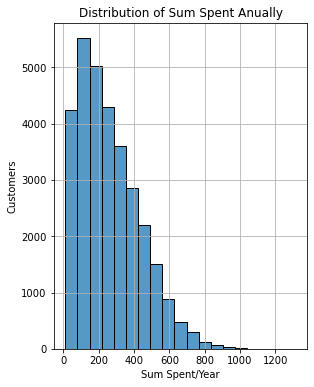

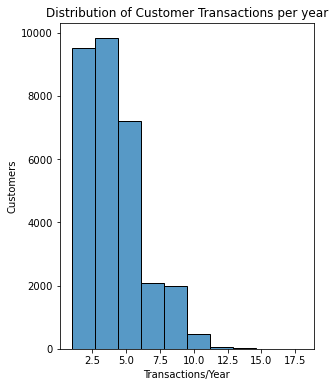

From these two graphs we can see that the data is mostly skewed to the left, with most of the customers spending less and also transacting less


In [19]:
# Plotting histogram of the sum and count to see the distribution

# Using Scots rule to calculate number of bins to use:
# Scots rule = 3.5 * standard deviation * (number of observations)^-1/3
number_of_bins_sum = int(3.5 * clnt_annual_aggregations['ann_txn_amt_sum'].std() * len(clnt_annual_aggregations)**(-1/3))
number_of_bins_count = int(3.5 * clnt_annual_aggregations['ann_txn_cnt'].std() * len(clnt_annual_aggregations)**(-1/3))

plt.figure(figsize=(10, 6))
plt.subplot(1,2,1)
sns.histplot(data= clnt_annual_aggregations, x='ann_txn_amt_sum', bins = number_of_bins_sum)
# clnt_annual_aggregations['ann_txn_amt_sum'].plot(kind='kde')
plt.title('Distribution of Sum Spent Anually')
plt.xlabel('Sum Spent/Year')
plt.ylabel('Customers')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.subplot(1,2,2)
sns.histplot(data= clnt_annual_aggregations, x='ann_txn_cnt', bins = 10)
plt.title('Distribution of Customer Transactions per year')
plt.xlabel('Transactions/Year')
plt.ylabel('Customers')
plt.show()

print( 'From these two graphs we can see that the data is mostly skewed to the left, with most of the customers spending less and also transacting less')



In [23]:
# Pivoting the table 
clnt_annual_aggregations_pivot = clnt_annual_aggregations.unstack(1)
print('\n')
print('There are 40 columns: for every year 2011-2015, the annual  sum, mean, std, var, sem, max, min, count is calculated, so 5 years and 8 statistical/descriptive calculation which give 40 columns ')

# Replacing NaN values 
# print('\n')
print('Replacing NaN with zero as the frequency of customers buying may not be yearly, so the sum can be zero, which makes other variables 0 too \n')
print('For Example this can be seen in the year 2015,customer CS116, the sum is NaN,meaning they did not buy that year so mean, std, var, sem, max, min, count are also NaN. This can simply be replaced by 0. \n')
clnt_annual_aggregations_pivot = clnt_annual_aggregations_pivot.fillna(value = 0)
print(clnt_annual_aggregations_pivot)


# Number of levels and columns 

print('\n')
print('There are 2 levels.For every column in the 1st level, there are 5 columns in the 2nd level, so as we have 8 columns in the first level and 5 for each column in the second level this gives us 40 columns \n')
print('Number of levels:',clnt_annual_aggregations_pivot . columns . nlevels)
clnt_annual_aggregations_pivot . columns



There are 40 columns: for every year 2011-2015, the annual  sum, mean, std, var, sem, max, min, count is calculated, so 5 years and 8 statistical/descriptive calculation which give 40 columns 
Replacing NaN with zero as the frequency of customers buying may not be yearly, so the sum can be zero, which makes other variables 0 too 

For Example this can be seen in the year 2015,customer CS116, the sum is NaN,meaning they did not buy that year so mean, std, var, sem, max, min, count are also NaN. This can simply be replaced by 0. 

            ann_txn_amt_sum                             ann_txn_amt_ave  \
year                   2011   2012   2013   2014   2015            2011   
customer_id                                                               
CS1112                212.0  337.0  212.0  212.0   39.0       70.666667   
CS1113                244.0  374.0  426.0  226.0  220.0       81.333333   
CS1114                426.0  150.0  352.0  425.0   79.0       85.200000   
CS1115       

MultiIndex([('ann_txn_amt_sum', 2011),
            ('ann_txn_amt_sum', 2012),
            ('ann_txn_amt_sum', 2013),
            ('ann_txn_amt_sum', 2014),
            ('ann_txn_amt_sum', 2015),
            ('ann_txn_amt_ave', 2011),
            ('ann_txn_amt_ave', 2012),
            ('ann_txn_amt_ave', 2013),
            ('ann_txn_amt_ave', 2014),
            ('ann_txn_amt_ave', 2015),
            ('ann_txn_amt_std', 2011),
            ('ann_txn_amt_std', 2012),
            ('ann_txn_amt_std', 2013),
            ('ann_txn_amt_std', 2014),
            ('ann_txn_amt_std', 2015),
            ('ann_txn_amt_var', 2011),
            ('ann_txn_amt_var', 2012),
            ('ann_txn_amt_var', 2013),
            ('ann_txn_amt_var', 2014),
            ('ann_txn_amt_var', 2015),
            ('ann_txn_amt_sem', 2011),
            ('ann_txn_amt_sem', 2012),
            ('ann_txn_amt_sem', 2013),
            ('ann_txn_amt_sem', 2014),
            ('ann_txn_amt_sem', 2015),
            ('ann_txn_amt

In [24]:
#Saving clnt_annual_aggregations_pivot as an.xlsx file
level_0 = clnt_annual_aggregations_pivot . columns . get_level_values ( 0 ) .astype ( str)
level_1 = clnt_annual_aggregations_pivot . columns . get_level_values ( 1 ) .astype ( str)
clnt_annual_aggregations_pivot . columns = level_0 + '_' + level_1

# Then save it, now we have annual features
clnt_annual_aggregations_pivot.to_excel('data/annual_features.xlsx')

clnt_annual_aggregations_pivot

<ipython-input-24-f2762c0ffbaf>:7: UserWarning: Pandas requires version '1.4.3' or newer of 'xlsxwriter' (version '1.3.8' currently installed).
  clnt_annual_aggregations_pivot.to_excel('data/annual_features.xlsx')
Exception ignored in: <function ZipFile.__del__ at 0x7fa96483c9d0>
Traceback (most recent call last):
  File "/Users/portiamasibi/opt/anaconda3/lib/python3.8/zipfile.py", line 1821, in __del__
    self.close()
  File "/Users/portiamasibi/opt/anaconda3/lib/python3.8/zipfile.py", line 1838, in close
    self.fp.seek(self.start_dir)
ValueError: seek of closed file


TimeoutError: [Errno 60] Operation timed out

### 2. Features that Capture Monthly Spending 

#### In this section we  compare Montlhy and Annual Sum and Count of transactions 

In [25]:
# Dataframe that captures how much a customer spends and number of transactions they make in a month
column_names = (['mth_txn_amt_sum','mth_txn_cnt'])
clnt_monthly_aggregations = transaction_data.groupby(['customer_id','month_end_date']).agg({'tran_amount':['sum','count']})
clnt_monthly_aggregations.columns = column_names
clnt_monthly_aggregations.head(15)



mth_txn_amt_sum  mth_txn_cnt
customer_id month_end_date                              
CS1112      2011-06-30                   56            1
            2011-08-31                   96            1
            2011-10-31                   60            1
            2012-04-30                   56            1
            2012-06-30                   52            1
            2012-07-31                   81            1
            2012-09-30                   72            1
            2012-12-31                   76            1
            2013-03-31                  105            1
            2013-07-31                   36            1
            2013-11-30                   71            1
            2014-04-30                   63            1
            2014-07-31                   90            1
            2014-12-31                   59            1
            2015-01-31                   39            1

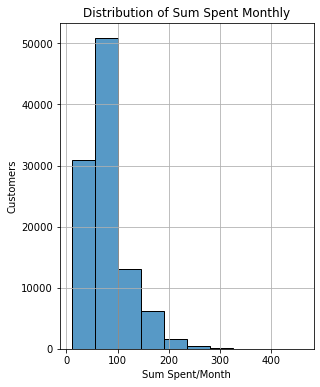

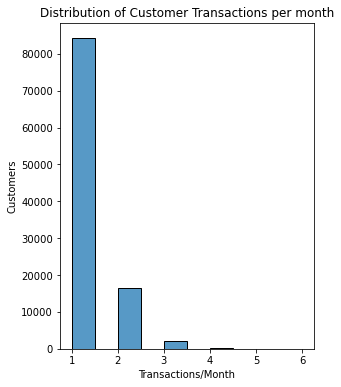

From these two graphs we can see that customers usually spend ~100/month and once a month


In [26]:

plt.figure(figsize=(10, 6))
plt.subplot(1,2,1)
sns.histplot(data= clnt_monthly_aggregations, x='mth_txn_amt_sum', bins = 10)
# clnt_annual_aggregations['ann_txn_amt_sum'].plot(kind='kde')
plt.title('Distribution of Sum Spent Monthly')
plt.xlabel('Sum Spent/Month')
plt.ylabel('Customers')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.subplot(1,2,2)
sns.histplot(data= clnt_monthly_aggregations, x='mth_txn_cnt', bins = 10)
plt.title('Distribution of Customer Transactions per month')
plt.xlabel('Transactions/Month')
plt.ylabel('Customers')
plt.show()

print( 'From these two graphs we can see that customers usually spend ~100/month and once a month')


Customers mostly buy once a month and spend $100 or less

For yearly data, customers mostly buy to about 6 times in a year and spend up to ~ $400 yearly


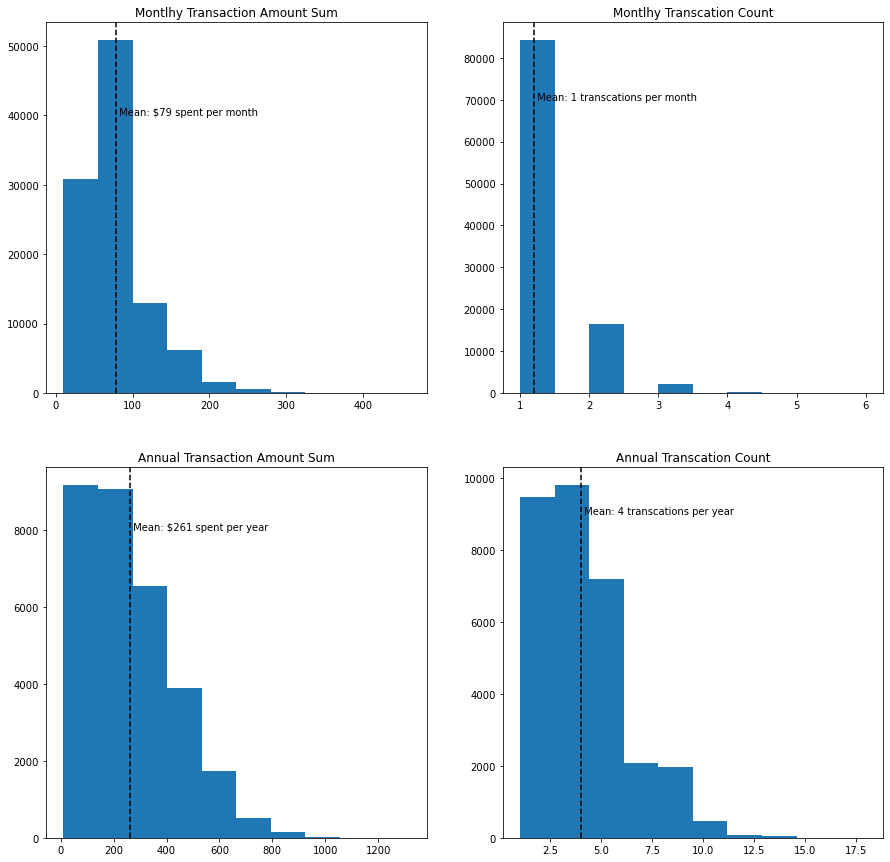

In [27]:
# Comparing Yearly & Monthly Histograms

fig, axs = plt.subplots(2, 2, figsize=(15,15) )
axs[0, 0].hist(clnt_monthly_aggregations['mth_txn_amt_sum'])
mean_1 = clnt_monthly_aggregations['mth_txn_amt_sum'].mean()
axs[0, 0].axvline(mean_1, color ='k', linestyle ='dashed')
axs[0, 0].text(mean_1, 40000, ' Mean: ${:.0f} spent per month'.format(mean_1))
axs[0, 0].set_title('Montlhy Transaction Amount Sum')


axs[0, 1].hist(clnt_monthly_aggregations['mth_txn_cnt'])
mean_2 = clnt_monthly_aggregations['mth_txn_cnt'].mean()
axs[0, 1].axvline(mean_2, color ='k', linestyle ='dashed')
axs[0, 1].text(mean_2, 70000, ' Mean: {:.0f} transcations per month'.format(mean_2))
axs[0, 1].set_title('Montlhy Transcation Count')

axs[1, 0].hist(clnt_annual_aggregations['ann_txn_amt_sum'])
mean_3 = clnt_annual_aggregations['ann_txn_amt_sum'].mean()
axs[1, 0].axvline(mean_3, color ='k', linestyle ='dashed')
axs[1, 0].text(mean_3, 8000, ' Mean: ${:.0f} spent per year'.format(mean_3))
axs[1, 0].set_title('Annual Transaction Amount Sum')

axs[1, 1].hist(clnt_annual_aggregations['ann_txn_cnt'])
mean_4 = clnt_annual_aggregations['ann_txn_cnt'].mean()
axs[1, 1].axvline(mean_4, color ='k', linestyle ='dashed')
axs[1, 1].text(mean_4, 9000, ' Mean: {:.0f} transcations per year'.format(mean_4))
axs[1, 1].set_title('Annual Transcation Count')


print('\nCustomers mostly buy once a month and spend $100 or less')
print('\nFor yearly data, customers mostly buy to about 6 times in a year and spend up to ~ $400 yearly')


### Creating monthly rolling window features to better capture customer trends

##### This is to convert the irregular transaction data into the typical time series data; data captured at equal intervals. Feature engineering of time series data gives you the potential to build very powerful predictive models.

### First we create the base table for the rolling window features

In [28]:
"""In order to create the rolling window features we need to create a base table with all possible 
combinations of ’customer id’ and ’month_end_date’. For example, customer CS1112 should have 47 entries (number of month end dates), 
one for each month, in which 15 will have the value of transaction amount and the rest 32 will have zero value for transaction amount.
 This will essentially help to convert the ”irregular” clnt monthly aggregations table into a ”regular” one."""


# Number of unique clients and unique month-end-dates
clnt_no = transaction_data["customer_id"]
me_dt = transaction_data['month_end_date']
print('Number of unique clients: ',clnt_no.nunique())
print('Number of unique month-end-dates: ',me_dt.nunique())


Number of unique clients:  6889
Number of unique month-end-dates:  47


In [29]:
""" Using  itertools.product to generate all the possible combinations of ’customer id’ and’ME DT’. 
Itertools is a Python module that iterates over data in a computationally efficient way

from itertools import product
base_table = product(clnt_no,me_dt)
print(type(base_table))

Converting the itertools product object into a pandas object 
base_table_pd = pd.DataFrame.from_records(base_table, columns = ['CLNT_NO','ME_DT'])
base_table_pd
- uncomment to try it, takes long though 
"""



" Using  itertools.product to generate all the possible combinations of ’customer id’ and’ME DT’. \nItertools is a Python module that iterates over data in a computationally efficient way\n\nfrom itertools import product\nbase_table = product(clnt_no,me_dt)\nprint(type(base_table))\n\nConverting the itertools product object into a pandas object \nbase_table_pd = pd.DataFrame.from_records(base_table, columns = ['CLNT_NO','ME_DT'])\nbase_table_pd\n- uncomment to try it, takes long though \n"

In [30]:
# If the intertools take longer 

cln = transaction_data['customer_id'].unique().tolist()
cln.sort()
len(cln)

dt = transaction_data['month_end_date'].unique().tolist()
len(dt)

# creating an array that is max 323,783 (47*6889) by 2 ( client,date)

bpt = []
for i in range(0,2000):
    for j in range(0,len(dt)):
        bpt.append([cln[i],dt[j]])
        
for i in range(2000,4000):
    for j in range(0,len(dt)):
        bpt.append([cln[i],dt[j]])
        
for i in range(4000,6889):
    for j in range(0,len(dt)):
        bpt.append([cln[i],dt[j]])

In [31]:
base_table_pd = pd.DataFrame(bpt, columns = ['CLNT_NO','month_end_date'])
# converting the 'month_end_date' column to datetime format
base_table_pd['month_end_date']= pd.to_datetime(base_table_pd['month_end_date'])

base_table_pd

,CLNT_NO,month_end_date
0,CS1112,2013-02-28
1,CS1112,2015-03-31
2,CS1112,2011-11-30
3,CS1112,2013-11-30
4,CS1112,2014-03-31
...,...,...
323778,CS9000,2011-08-31
323779,CS9000,2012-09-30
323780,CS9000,2014-09-30
323781,CS9000,2014-02-28


In [32]:
# Validating that the table created is correct
# First checking the number of unique clients and number of unique month end dates 

# Confirming base_table_pd details 

print('Rows of the Base Table are:', len(base_table_pd))
print('Unique clients:', base_table_pd['CLNT_NO'].nunique())
print('Unique month ends:',base_table_pd['month_end_date'].nunique())


Rows of the Base Table are: 323783
Unique clients: 6889
Unique month ends: 47


In [33]:
# Then checking filtering a client to see if the min and max dates fall between 2011-05-16 00:00:00  and 2015-03-16 00:00:00

contain_values= base_table_pd[base_table_pd['CLNT_NO'].str.contains('CS1112')]   
CS1112 = pd.DataFrame(contain_values)

min_date_CS1112 = min(CS1112["month_end_date"])
max_date_CS1112 = max(CS1112["month_end_date"])

print('The min of the transaction dates for customer CS1112 is:', min_date_CS1112)
print('The max of the transaction dates for customer CS1112 is:', max_date_CS1112)
print('So the min and max month dates fall within the range \n')

print('Client CS1112 has',len(CS1112),'rows')



The min of the transaction dates for customer CS1112 is: 2011-05-31 00:00:00
The max of the transaction dates for customer CS1112 is: 2015-03-31 00:00:00
So the min and max month dates fall within the range 

Client CS1112 has 47 rows


#### Now that we have the base table we can create the monthly rolling window features

In [34]:
# Left-joining the base table pd with the clnt monthly aggregations table from section on 
# [CLNT NO, ME DT] to create the table base clnt mth

clnt_monthly_aggregations1 = clnt_monthly_aggregations.reset_index(level='month_end_date')
clnt_monthly_aggregations2 = clnt_monthly_aggregations1.reset_index(level='customer_id')
clnt_monthly_aggregations2  = clnt_monthly_aggregations2.rename(columns={'customer_id': 'CLNT_NO'})
clnt_monthly_aggregations2 


,CLNT_NO,month_end_date,mth_txn_amt_sum,mth_txn_cnt
0,CS1112,2011-06-30,56,1
1,CS1112,2011-08-31,96,1
2,CS1112,2011-10-31,60,1
3,CS1112,2012-04-30,56,1
4,CS1112,2012-06-30,52,1
...,...,...,...,...
103229,CS9000,2014-01-31,16,1
103230,CS9000,2014-05-31,20,1
103231,CS9000,2014-07-31,26,1
103232,CS9000,2014-08-31,35,1


In [35]:
# Joining base_table_pd with clnt_monthly_aggregations
base_clnt_mth = pd.merge(base_table_pd,clnt_monthly_aggregations2,on = ['CLNT_NO','month_end_date'],how='left')
base_clnt_mth


,CLNT_NO,month_end_date,mth_txn_amt_sum,mth_txn_cnt
0,CS1112,2013-02-28,NaN,NaN
1,CS1112,2015-03-31,NaN,NaN
2,CS1112,2011-11-30,NaN,NaN
3,CS1112,2013-11-30,71.0,1.0
4,CS1112,2014-03-31,NaN,NaN
...,...,...,...,...
323778,CS9000,2011-08-31,NaN,NaN
323779,CS9000,2012-09-30,NaN,NaN
323780,CS9000,2014-09-30,NaN,NaN
323781,CS9000,2014-02-28,NaN,NaN


In [36]:
print('Some rows on the merged dataframe have NaN as for those dates/months there are no transactions so the NaN will be replaced by 0 in both the sum and count values \n')
print('The dataframe has  rows as expected as it was merged to the base_table_pd with 323,783 rows \n')
print('The base_clnt_mth has 323,783 rows and the clnt_monthly_aggregation has 103,234, the difference is beacuse for the clnt_monthly_aggregation it only captures months of transactions while the base_clnt_month captures all months, with or without transactions')
base_clnt_mth = base_clnt_mth.fillna(0)
base_clnt_mth

Some rows on the merged dataframe have NaN as for those dates/months there are no transactions so the NaN will be replaced by 0 in both the sum and count values 

The dataframe has  rows as expected as it was merged to the base_table_pd with 323,783 rows 

The base_clnt_mth has 323,783 rows and the clnt_monthly_aggregation has 103,234, the difference is beacuse for the clnt_monthly_aggregation it only captures months of transactions while the base_clnt_month captures all months, with or without transactions


,CLNT_NO,month_end_date,mth_txn_amt_sum,mth_txn_cnt
0,CS1112,2013-02-28,0.0,0.0
1,CS1112,2015-03-31,0.0,0.0
2,CS1112,2011-11-30,0.0,0.0
3,CS1112,2013-11-30,71.0,1.0
4,CS1112,2014-03-31,0.0,0.0
...,...,...,...,...
323778,CS9000,2011-08-31,0.0,0.0
323779,CS9000,2012-09-30,0.0,0.0
323780,CS9000,2014-09-30,0.0,0.0
323781,CS9000,2014-02-28,0.0,0.0


In [37]:
# Sorting client names and dates in ascending order, necessary for creating the order for rolling windows
base_clnt_mth = base_clnt_mth.sort_values(by = ['CLNT_NO','month_end_date'])
base_clnt_mth.head(50)

,CLNT_NO,month_end_date,mth_txn_amt_sum,mth_txn_cnt
37,CS1112,2011-05-31,0.0,0.0
31,CS1112,2011-06-30,56.0,1.0
17,CS1112,2011-07-31,0.0,0.0
42,CS1112,2011-08-31,96.0,1.0
33,CS1112,2011-09-30,0.0,0.0
21,CS1112,2011-10-31,60.0,1.0
2,CS1112,2011-11-30,0.0,0.0
22,CS1112,2011-12-31,0.0,0.0
19,CS1112,2012-01-31,0.0,0.0
5,CS1112,2012-02-29,0.0,0.0


In [38]:
# Using the rolling window to calculate statistical properties
# We get NaN values  because when using rolling window and looking back, where the window size is n, the rolling looks for n-1 rows of data to aggregate,
#  when the condition is not met, it will return NaN for the window. If it is 3, it looks for n-3,n-2,n-1, if this is at a time that is out of bounds, 
# these will be NaN, to avoid this we set the min_periods = window

# window_size = 3
indv_client = base_clnt_mth.groupby('CLNT_NO')
rolling_features_3M = indv_client.rolling(window = 3, min_periods = 3)['mth_txn_amt_sum','mth_txn_cnt'].agg(['sum','mean','max'])

#window_size = 6
rolling_features_6M = indv_client.rolling(window = 6, min_periods = 6)['mth_txn_amt_sum','mth_txn_cnt'].agg(['sum','mean','max'])

#window_size = 12
rolling_features_12M = indv_client.rolling(window = 12, min_periods = 12)['mth_txn_amt_sum','mth_txn_cnt'].agg(['sum','mean','max'])


In [39]:
# Renaming columns and changing it to 1 level rom the 2 multi-index dataframe, makes it easier to save in excel
# Also have to fill in missing values 
columns3M = ['amt_sum_3M','amt_mean_3M','amt_max_3M','txn_cnt_sum_3M','txn_cnt_mean_3M','txn_cnt_max_3M']
rolling_features_3M.columns = columns3M
# rolling_features_3M.head(10)

columns6M = ['amt_sum_6M','amt_mean_6M','amt_max_6M','txn_cnt_sum_6M','txn_cnt_mean_6M','txn_cnt_max_6M']
rolling_features_6M.columns = columns6M
# rolling_features_6M.head(10)

columns12M = ['amt_sum_12M','amt_mean_12M','amt_max12M','txn_cnt_sum_12M','txn_cnt_mean_12M','txn_cnt_max_12M']
rolling_features_12M.columns = columns12M
# rolling_features_12M.head(20)


In [40]:
# Merging tables  with the base_clnt_mth
# first dropping index level:0 
rolling_features_3M = rolling_features_3M.droplevel(0)
rolling_features_6M = rolling_features_6M.droplevel(0)
rolling_features_12M = rolling_features_12M.droplevel(0)


In [41]:
all_rolling_features = pd.merge(base_clnt_mth,rolling_features_3M,left_index=True, right_index=True)
all_rolling_features = pd.merge(all_rolling_features,rolling_features_6M,left_index=True, right_index=True)
all_rolling_features = pd.merge(all_rolling_features,rolling_features_12M,left_index=True, right_index=True)
all_rolling_features

,CLNT_NO,month_end_date,mth_txn_amt_sum,mth_txn_cnt,amt_sum_3M,amt_mean_3M,amt_max_3M,txn_cnt_sum_3M,txn_cnt_mean_3M,txn_cnt_max_3M,...,amt_max_6M,txn_cnt_sum_6M,txn_cnt_mean_6M,txn_cnt_max_6M,amt_sum_12M,amt_mean_12M,amt_max12M,txn_cnt_sum_12M,txn_cnt_mean_12M,txn_cnt_max_12M
37,CS1112,2011-05-31,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,CS1112,2011-06-30,56.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,CS1112,2011-07-31,0.0,0.0,56.0,18.666667,56.0,1.0,0.333333,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42,CS1112,2011-08-31,96.0,1.0,152.0,50.666667,96.0,2.0,0.666667,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,CS1112,2011-09-30,0.0,0.0,96.0,32.000000,96.0,1.0,0.333333,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323763,CS9000,2014-11-30,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,35.0,2.0,0.333333,1.0,97.0,8.083333,35.0,4.0,0.333333,1.0
323749,CS9000,2014-12-31,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,35.0,2.0,0.333333,1.0,97.0,8.083333,35.0,4.0,0.333333,1.0
323742,CS9000,2015-01-31,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,35.0,1.0,0.166667,1.0,81.0,6.750000,35.0,3.0,0.250000,1.0
323759,CS9000,2015-02-28,34.0,1.0,34.0,11.333333,34.0,1.0,0.333333,1.0,...,34.0,1.0,0.166667,1.0,115.0,9.583333,35.0,4.0,0.333333,1.0


In [42]:
# Saving it as an xlsx file 
all_rolling_features.to_excel('data/mth_rolling_features.xlsx')

<ipython-input-42-dff2403b3079>:2: UserWarning: Pandas requires version '1.4.3' or newer of 'xlsxwriter' (version '1.3.8' currently installed).
  all_rolling_features.to_excel('data/mth_rolling_features.xlsx')


TimeoutError: [Errno 60] Operation timed out

## 3. Date Related Features : Date of the Week 
#####  Date-related features that capture information about the day of the week and the transactions that were performed

In [43]:
# The DatetimeIndex object allows extraction of many components of a DateTime object
# Here, we want to extract the day of the week from column ’txn date’ of the txn table (with Monday=0, Sunday=6)

day_of_the_week = transaction_data['txn_date'].dt.dayofweek
transaction_data['day_of_the_week'] = day_of_the_week 

day_name = transaction_data['txn_date'].dt.day_name()
transaction_data['day_name'] = day_name

transaction_data


,customer_id,tran_amount,txn_date,month_end_date,year,day_of_the_week,day_name
0,CS5295,35,2013-02-11,2013-02-28,2013,0,Monday
1,CS4768,39,2015-03-15,2015-03-31,2015,6,Sunday
2,CS2122,52,2013-02-26,2013-02-28,2013,1,Tuesday
3,CS1217,99,2011-11-16,2011-11-30,2011,2,Wednesday
4,CS1850,78,2013-11-20,2013-11-30,2013,2,Wednesday
...,...,...,...,...,...,...,...
124995,CS8433,64,2011-06-26,2011-06-30,2011,6,Sunday
124996,CS7232,38,2014-08-19,2014-08-31,2014,1,Tuesday
124997,CS8731,42,2014-11-28,2014-11-30,2014,4,Friday
124998,CS8133,13,2013-12-14,2013-12-31,2013,5,Saturday



From the figure below, the transcations per day are evenly distributed


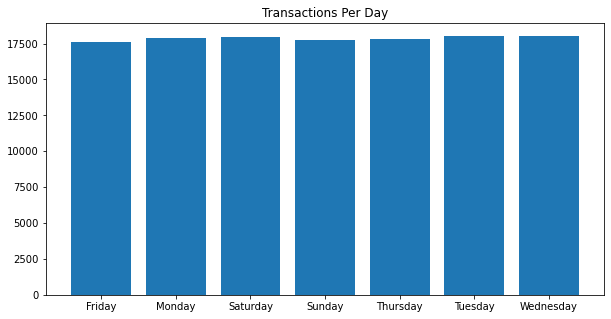

In [44]:
# Bar plot of count of transactions per day of the week 

x = transaction_data.groupby('day_name').count()
fig = plt.figure(figsize=(10,5))
plt.bar(x.index,x['day_of_the_week'])
plt.title('Transactions Per Day')

print('\nFrom the figure below, the transcations per day are evenly distributed')


In [45]:
# Capturing the count of transactions per client,year and day of the week

clnt_daily_aggregations = transaction_data.groupby(['customer_id','year','day_name']).count()
clnt_daily_aggregations = clnt_daily_aggregations.unstack(1)
clnt_daily_aggregations = clnt_daily_aggregations.unstack(1)
clnt_daily_aggregations = clnt_daily_aggregations['tran_amount']
clnt_daily_aggregations = clnt_daily_aggregations.fillna(0)

# Dropping a level from a 3 level multi-level dataframe and remaning columns 
clnt_daily_aggregations = clnt_daily_aggregations.droplevel(0,axis = 1)


# Adding column names 

columns_daily =['cnt_2011_Friday','cnt_2011_Monday','cnt_2011_Saturday','cnt_2011_Sunday','cnt_2011_Thursday','cnt_2011_Tuesday','cnt_2011_Wednesday',
                'cnt_2012_Friday','cnt_2012_Monday','cnt_2012_Saturday','cnt_2012_Sunday','cnt_2012_Thursday','cnt_2012_Tuesday','cnt_2012_Wednesday',
                'cnt_2013_Friday','cnt_2013_Monday','cnt_2013_Saturday','cnt_2013_Sunday','cnt_2013_Thursday','cnt_2013_Tuesday','cnt_2013_Wednesday',
                'cnt_2014_Friday','cnt_2014_Monday','cnt_2014_Saturday','cnt_2014_Sunday','cnt_2014_Thursday','cnt_2014_Tuesday','cnt_2014_Wednesday',
                'cnt_2015_Friday','cnt_2015_Monday','cnt_2015_Saturday','cnt_2015_Sunday','cnt_2015_Thursday','cnt_2015_Tuesday','cnt_2015_Wednesday']


clnt_daily_aggregations.columns = columns_daily


#Confirming that output has the same number of rows as the annual features
print('clnt_annual_aggregations_pivot length:',len(clnt_annual_aggregations_pivot))
print('clnt_daily_aggregations length:', len(clnt_daily_aggregations))
# Therefore same number of rows 
clnt_daily_aggregations


clnt_annual_aggregations_pivot length: 6889
clnt_daily_aggregations length: 6889


,cnt_2011_Friday,cnt_2011_Monday,cnt_2011_Saturday,cnt_2011_Sunday,cnt_2011_Thursday,cnt_2011_Tuesday,cnt_2011_Wednesday,cnt_2012_Friday,cnt_2012_Monday,cnt_2012_Saturday,...,cnt_2014_Thursday,cnt_2014_Tuesday,cnt_2014_Wednesday,cnt_2015_Friday,cnt_2015_Monday,cnt_2015_Saturday,cnt_2015_Sunday,cnt_2015_Thursday,cnt_2015_Tuesday,cnt_2015_Wednesday
customer_id,,,,,,,,,,,,,,,,,,,,,
CS1112,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
CS1113,1.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0,0.0,...,0.0,3.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0
CS1114,0.0,1.0,0.0,1.0,1.0,0.0,2.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
CS1115,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,...,2.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
CS1116,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CS8996,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,...,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CS8997,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CS8998,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
# saving as excel file with 35 features/ columns 
clnt_daily_aggregations.to_excel('data/annual_day_of_week_counts_pivot.xlsx')

<ipython-input-46-e9f06705d7b5>:2: UserWarning: Pandas requires version '1.4.3' or newer of 'xlsxwriter' (version '1.3.8' currently installed).
  clnt_daily_aggregations.to_excel('data/annual_day_of_week_counts_pivot.xlsx')


Exception ignored in: <function ZipFile.__del__ at 0x7fa96483c9d0>
Traceback (most recent call last):
  File "/Users/portiamasibi/opt/anaconda3/lib/python3.8/zipfile.py", line 1821, in __del__
    self.close()
  File "/Users/portiamasibi/opt/anaconda3/lib/python3.8/zipfile.py", line 1838, in close
    self.fp.seek(self.start_dir)
TimeoutError: [Errno 60] Operation timed out


TimeoutError: [Errno 60] Operation timed out

In [47]:
# Creating Features that capture the count of transactions per client,month-end-date and day of the week 

clnt_daily_month_aggregations = transaction_data.groupby(['customer_id','month_end_date','day_name']).count()
clnt_daily_month_aggregations = clnt_daily_month_aggregations.unstack(2)
clnt_daily_month_aggregations = clnt_daily_month_aggregations['tran_amount']
clnt_daily_month_aggregations = clnt_daily_month_aggregations.fillna(0)
clnt_daily_month_aggregations

columns_daily_month = ['cnt_Friday','cnt_Monday','cnt_Saturday','cnt_Sunday','cnt_Thursday','cnt_Tuesday','cnt_Wednesday']

clnt_daily_month_aggregations.columns = columns_daily_month

# Joining with base_table 
clnt_daily_month_aggregations1 = clnt_daily_month_aggregations.reset_index(level='month_end_date')
clnt_daily_month_aggregations2 = clnt_daily_month_aggregations1.reset_index(level='customer_id')
clnt_daily_month_aggregations2  = clnt_daily_month_aggregations2.rename(columns={'customer_id': 'CLNT_NO'})
clnt_daily_month_aggregations2


,CLNT_NO,month_end_date,cnt_Friday,cnt_Monday,cnt_Saturday,cnt_Sunday,cnt_Thursday,cnt_Tuesday,cnt_Wednesday
0,CS1112,2011-06-30,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,CS1112,2011-08-31,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,CS1112,2011-10-31,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,CS1112,2012-04-30,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,CS1112,2012-06-30,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
103229,CS9000,2014-01-31,0.0,0.0,0.0,1.0,0.0,0.0,0.0
103230,CS9000,2014-05-31,0.0,0.0,0.0,0.0,1.0,0.0,0.0
103231,CS9000,2014-07-31,0.0,0.0,0.0,0.0,0.0,1.0,0.0
103232,CS9000,2014-08-31,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [48]:
monthly_day_counts = pd.merge(base_table_pd,clnt_daily_month_aggregations2,on = ['CLNT_NO','month_end_date'],how='left')
monthly_day_counts = monthly_day_counts .fillna(0)
monthly_day_counts.to_excel('data/mth_day_counts.xlsx')


<ipython-input-48-87a32d7b09eb>:3: UserWarning: Pandas requires version '1.4.3' or newer of 'xlsxwriter' (version '1.3.8' currently installed).
  monthly_day_counts.to_excel('data/mth_day_counts.xlsx')
Exception ignored in: <function ZipFile.__del__ at 0x7fa96483c9d0>
Traceback (most recent call last):
  File "/Users/portiamasibi/opt/anaconda3/lib/python3.8/zipfile.py", line 1821, in __del__
    self.close()
  File "/Users/portiamasibi/opt/anaconda3/lib/python3.8/zipfile.py", line 1838, in close
    self.fp.seek(self.start_dir)
TimeoutError: [Errno 60] Operation timed out


TimeoutError: [Errno 60] Operation timed out

### 4. Date-related Features: Days Since Last Transaction

##### In this date-related features set,we capture the frequency of the transactions in terms of the days since the last transaction. This set of features applies only to the monthly features.

In [49]:
# Capturing last monthly purchase 
# The starting point is the txn table. Recall that most clients have a single purchase per month, but some clients 
# have multiple purchases in a month. Since we want to calculate the ”days since last transaction”, we want to capture
# the last transaction in a month for every client

last_monthly_purchase = transaction_data.groupby(['customer_id','month_end_date']).max()
last_monthly_purchase = last_monthly_purchase['txn_date']
last_monthly_purchase 

customer_id  month_end_date
CS1112       2011-06-30       2011-06-15
             2011-08-31       2011-08-19
             2011-10-31       2011-10-02
             2012-04-30       2012-04-08
             2012-06-30       2012-06-24
                                 ...    
CS9000       2014-01-31       2014-01-12
             2014-05-31       2014-05-08
             2014-07-31       2014-07-08
             2014-08-31       2014-08-24
             2015-02-28       2015-02-28
Name: txn_date, Length: 103234, dtype: datetime64[ns]

In [50]:

#Joining base table pd with last monthly purchase
last_monthly_purchase1 = last_monthly_purchase.reset_index(level='month_end_date')
last_monthly_purchase2 = last_monthly_purchase1.reset_index(level='customer_id')
last_monthly_purchase2  = last_monthly_purchase2.rename(columns={'customer_id': 'CLNT_NO'})
last_monthly_purchase2 = last_monthly_purchase2.rename(columns={'txn_date': 'last_monthly_purchase'})

base_table_pd_sorted = base_table_pd.sort_values(by = ['CLNT_NO','month_end_date'])

last_monthly_purchase_base = pd.merge(base_table_pd_sorted,last_monthly_purchase2,on = ['CLNT_NO','month_end_date'],how='left')
last_monthly_purchase_base 

,CLNT_NO,month_end_date,last_monthly_purchase
0,CS1112,2011-05-31,NaT
1,CS1112,2011-06-30,2011-06-15
2,CS1112,2011-07-31,NaT
3,CS1112,2011-08-31,2011-08-19
4,CS1112,2011-09-30,NaT
...,...,...,...
323778,CS9000,2014-11-30,NaT
323779,CS9000,2014-12-31,NaT
323780,CS9000,2015-01-31,NaT
323781,CS9000,2015-02-28,2015-02-28


In [51]:
# Filling NaT with previous date
last_monthly_purchase_base = last_monthly_purchase_base.groupby('CLNT_NO').apply(lambda x: x.ffill())
last_monthly_purchase_base = last_monthly_purchase_base.droplevel(0)
last_monthly_purchase_base 

Exception ignored in: <function ZipFile.__del__ at 0x7fa96483c9d0>
Traceback (most recent call last):
  File "/Users/portiamasibi/opt/anaconda3/lib/python3.8/zipfile.py", line 1821, in __del__
    self.close()
  File "/Users/portiamasibi/opt/anaconda3/lib/python3.8/zipfile.py", line 1838, in close
    self.fp.seek(self.start_dir)
TimeoutError: [Errno 60] Operation timed out


,CLNT_NO,month_end_date,last_monthly_purchase
0,CS1112,2011-05-31,NaT
1,CS1112,2011-06-30,2011-06-15
2,CS1112,2011-07-31,2011-06-15
3,CS1112,2011-08-31,2011-08-19
4,CS1112,2011-09-30,2011-08-19
...,...,...,...
323778,CS9000,2014-11-30,2014-08-24
323779,CS9000,2014-12-31,2014-08-24
323780,CS9000,2015-01-31,2014-08-24
323781,CS9000,2015-02-28,2015-02-28


In [52]:
# Computing days since last transaction
# Subtracting the two date columns to calculate the column ’days since last txn’ 

days_since_last_txn = last_monthly_purchase_base.groupby('CLNT_NO')['last_monthly_purchase'].diff()

days_since_last_txn = days_since_last_txn.dt.days

last_monthly_purchase_base['days_since_last_txn'] = days_since_last_txn 

last_monthly_purchase_base

,CLNT_NO,month_end_date,last_monthly_purchase,days_since_last_txn
0,CS1112,2011-05-31,NaT,NaN
1,CS1112,2011-06-30,2011-06-15,NaN
2,CS1112,2011-07-31,2011-06-15,0.0
3,CS1112,2011-08-31,2011-08-19,65.0
4,CS1112,2011-09-30,2011-08-19,0.0
...,...,...,...,...
323778,CS9000,2014-11-30,2014-08-24,0.0
323779,CS9000,2014-12-31,2014-08-24,0.0
323780,CS9000,2015-01-31,2014-08-24,0.0
323781,CS9000,2015-02-28,2015-02-28,188.0


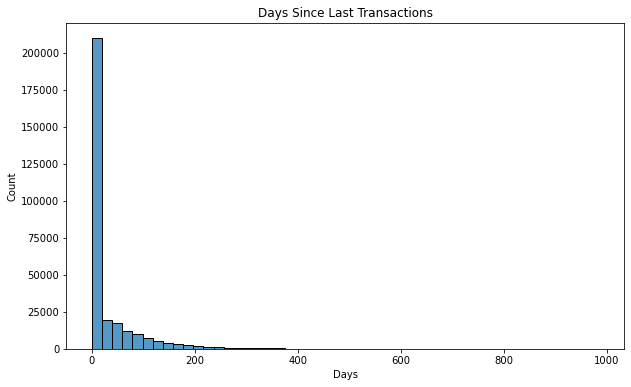

This histogram shows us that most customers generally have about 20 days between transactions


In [53]:
plt.figure(figsize=(10, 6))
sns.histplot(data= last_monthly_purchase_base, x='days_since_last_txn', bins = 50)
plt.title('Days Since Last Transactions')
plt.xlabel('Days')
plt.ylabel('Count')
plt.show()

print('This histogram shows us that most customers generally have about 20 days between transactions')


In [54]:
print('The days with the common density is 20 so this is used to fill in number of days since last transaction values that give NaN')
last_monthly_purchase_base['days_since_last_txn'] = last_monthly_purchase_base['days_since_last_txn'].fillna(20)
last_monthly_purchase_base


The days with the common density is 20 so this is used to fill in number of days since last transaction values that give NaN


,CLNT_NO,month_end_date,last_monthly_purchase,days_since_last_txn
0,CS1112,2011-05-31,NaT,20.0
1,CS1112,2011-06-30,2011-06-15,20.0
2,CS1112,2011-07-31,2011-06-15,0.0
3,CS1112,2011-08-31,2011-08-19,65.0
4,CS1112,2011-09-30,2011-08-19,0.0
...,...,...,...,...
323778,CS9000,2014-11-30,2014-08-24,0.0
323779,CS9000,2014-12-31,2014-08-24,0.0
323780,CS9000,2015-01-31,2014-08-24,0.0
323781,CS9000,2015-02-28,2015-02-28,188.0


In [55]:
# Saving to excel
days_since_last_txn_excel = last_monthly_purchase_base.drop(['last_monthly_purchase'], axis = 1)
days_since_last_txn_excel.to_excel('data/days_since_last_txn.xlsx')

<ipython-input-55-4f1a7b61169c>:3: UserWarning: Pandas requires version '1.4.3' or newer of 'xlsxwriter' (version '1.3.8' currently installed).
  days_since_last_txn_excel.to_excel('data/days_since_last_txn.xlsx')


TimeoutError: [Errno 60] Operation timed out

#### RECAP : We created new features to use in our models, which are 
##### 1. Features that capture Annual Spending - sum,count,average spent statistical features 
##### 2. Features that Capture Monthly Spending - rolling windows for 3,6, 12 months, then calculated statistical features of these
##### 3. Date Related Features : Date of the Week Transaction was Performed 
##### 4. Date-related Features: Days Since Last Transaction

##### These features capture the  RFM used to identufy the firms best clients based on the nature of their spending habits.
##### In particular, it evaluates customers’ recency (days since last transaction), frequency (how often they make purchases, count yearly, monthly, in 3,6,12 month intervals), and monetary value (how much money they spend, yearly and monthly)
